<pre>
Name: Ritika Sarkar
Reg. No.: 19BAI1031
</pre>

### Image Basics and Denoising

Dataset - [Histopathologic Cancer Detection](https://www.kaggle.com/c/histopathologic-cancer-detection)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
! pip install kaggle

In [ ]:
mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets download pranavraikokte/covid19-image-dataset

In [ ]:
# !unzip covid19-image-dataset.zip > /dev/null

In [ ]:
!kaggle competitions download histopathologic-cancer-detection

  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 23.9MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 29.9MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 32.5MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 31.8MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 33.8MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 29.0MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 28.5MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 36.8MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 23.4MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 43.4MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 26.1MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 32.7MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 27.9MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [0

#### 1. Importing the image

In [ ]:
image = cv2.imread('/content/00001b2b5609af42ab0ab276dd4cd41c3e7745b5.tif')

In [ ]:
image.shape

(96, 96, 3)

In [ ]:
reimage = cv2.resize(image, (150,150), interpolation = cv2.INTER_AREA)

In [ ]:
# converting to grayscale
grayimg = cv2.cvtColor(reimage, cv2.COLOR_BGR2GRAY)

Original image


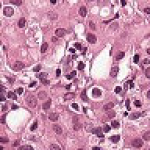

In [ ]:
from google.colab.patches import cv2_imshow
print("Original image")
cv2_imshow(reimage)

Gray image


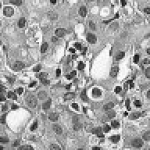

In [ ]:
print("Gray image")
cv2_imshow(grayimg)

#### 2.1. Adding noise using Imgaug

In [ ]:
! pip uninstall imgaug

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/imgaug-0.2.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/imgaug/*
Proceed (y/n)? y
  Successfully uninstalled imgaug-0.2.9


In [ ]:
! pip install imgaug

     |████████████████████████████████| 948 kB 8.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


In [ ]:
#from skimage.util import random_noise
from imgaug import augmenters as iaa

##### a. Gaussian Noise

RGB image


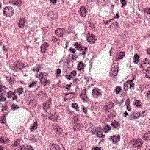

Original


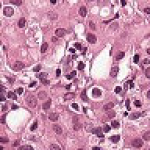

In [ ]:
gnso = iaa.AdditiveGaussianNoise(loc=0, scale=0.1*255)
gnso = gnso.augment_image(reimage)
print("RGB image")
cv2_imshow(gnso)
print("Original")
cv2_imshow(reimage)

Gray image


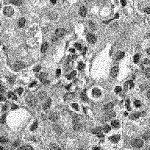

Original


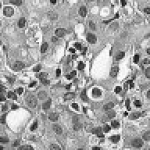

In [ ]:
gnsg = iaa.AdditiveGaussianNoise(loc=0, scale=0.1*255)
gnsg = gnsg.augment_image(grayimg)
print("Gray image")
cv2_imshow(gnsg)
print("Original")
cv2_imshow(grayimg)

##### b. Salt and Pepper noise

RGB image


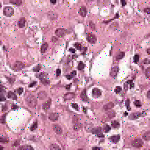

Original


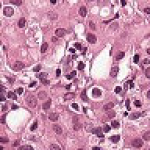

In [ ]:
spo = iaa.SaltAndPepper(p = 0.015, per_channel=True)
spo = spo.augment_image(reimage)
print("RGB image")
cv2_imshow(spo)
print("Original")
cv2_imshow(reimage)

Gray image


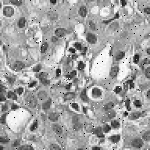

Original


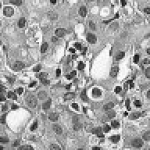

In [ ]:
spg = iaa.SaltAndPepper(p = 0.015)
spg = spg.augment_image(grayimg)
print("Gray image")
cv2_imshow(spg)
print("Original")
cv2_imshow(grayimg)

##### c. Poisson Noise

RGB image


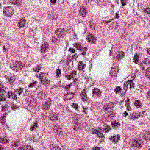

Original


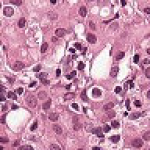

In [ ]:
po = iaa.AdditivePoissonNoise(lam=40.0, per_channel=True)
po = po.augment_image(reimage)
print("RGB image")
cv2_imshow(po)
print("Original")
cv2_imshow(reimage)

Gray image


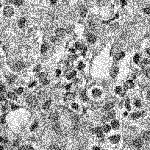

Original


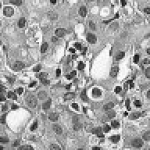

In [ ]:
pg = iaa.AdditivePoissonNoise(lam=40.0, per_channel=True)
pg = pg.augment_image(grayimg)
print("Gray image")
cv2_imshow(pg)
print("Original")
cv2_imshow(grayimg)

##### d. Speckle Noise

In [ ]:
! pip install imagecorruptions

     |████████████████████████████████| 2.1 MB 7.8 MB/s 


RGB image


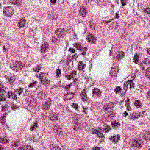

Original


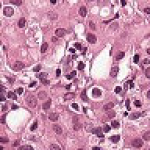

In [ ]:
so = iaa.imgcorruptlike.SpeckleNoise(severity=4)
so = so.augment_image(reimage)
print("RGB image")
cv2_imshow(po)
print("Original")
cv2_imshow(reimage)

Gray image


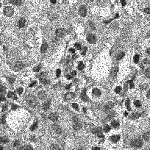

Original


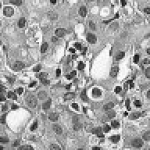

In [ ]:
sg = iaa.imgcorruptlike.SpeckleNoise(severity=2)
sg = sg.augment_image(grayimg)
print("Gray image")
cv2_imshow(sg)
print("Original")
cv2_imshow(grayimg)

#### 2.2. Adding noise manually

##### a. Gaussian Noise

In [ ]:
def gauss_noise(image):
    gnmo = image.copy()
    mean = 0
    var = 0.1
    # sigma = var**0.5
    sigma = 0.1*255
    if len(gnmo.shape) == 2:
        row,col = gnmo.shape
        gauss = np.random.normal(mean,sigma,(row,col))
        gauss = gauss.reshape(row,col)
        noisy = gnmo+gauss
        print("Gray image")
        cv2_imshow(noisy)
    else:
        row,col,ch = gnmo.shape
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = gnmo+gauss
        print("RGB image")
        cv2_imshow(noisy)

RGB image


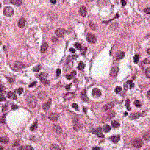

Original


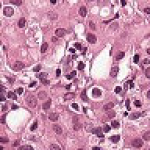

In [ ]:
gauss_noise(reimage)
print("Original")
cv2_imshow(reimage)

Gray image


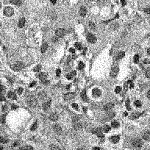

Original image


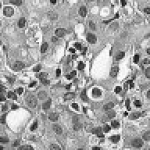

In [ ]:
gauss_noise(grayimg)
print("Original image")
cv2_imshow(grayimg)

##### b. Salt and Pepper noise

In [ ]:
def saltpep(image):
    spo = image.copy()
    if (len(spo.shape) == 2):
        row, col = spo.shape
    else:
        row, col, ch = spo.shape
    salt = random.randint(20,100)
    pepper = random.randint(20,100)
    # Salt mode
    for _ in range(salt):
        row_c = random.randint(0,row-1)
        col_c = random.randint(0,col-1)
        spo[row_c][col_c] = 255

    # Pepper mode
    for _ in range(pepper):
        row_c = random.randint(0,row-1)
        col_c = random.randint(0,col-1)
        spo[row_c][col_c] = 0
    cv2_imshow(spo)

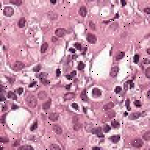

Original


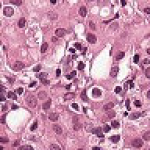

In [ ]:
saltpep(reimage)
print("Original")
cv2_imshow(reimage)

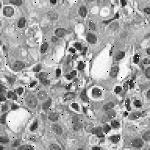

Original


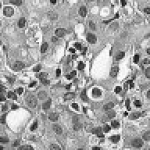

In [ ]:
saltpep(grayimg)
print("Original")
cv2_imshow(grayimg)

##### c. Poisson Noise

In [ ]:
def poisson(image):
    # noisy = np.random.poisson(20.0, image.shape)
    PEAK = 0.000001 # [0,1]
    noisy = np.random.poisson(image * 255.0 * PEAK) / PEAK / 255
    cv2_imshow(image + np.random.poisson(noisy))

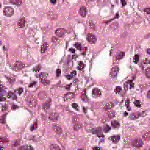

Original image


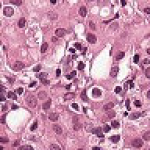

In [ ]:
poisson(reimage)
print("Original image")
cv2_imshow(reimage)

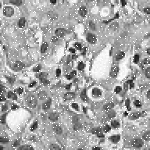

Original image


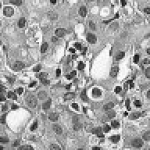

In [ ]:
poisson(grayimg)
print("Original image")
cv2_imshow(grayimg)

##### d. Speckle Noise

In [ ]:
def speckle(image):
    gnmo = image.copy()
    mean = 0.
    sigma = 0.2
    if len(gnmo.shape) == 2:
        row,col = gnmo.shape
        gauss = np.random.normal(mean,sigma,(row,col))
        gauss = gauss.reshape(row,col)
        noisy = image + image * gauss
        print("Gray image")
        cv2_imshow(noisy)
    else:
        row,col,ch = gnmo.shape
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + image * gauss
        print("RGB image")
        cv2_imshow(noisy)

RGB image


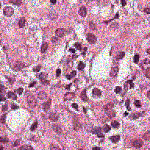

Original image


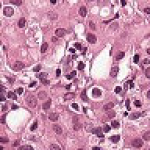

In [ ]:
speckle(reimage)
print("Original image")
cv2_imshow(reimage)

Gray image


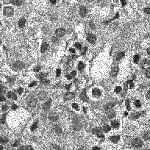

Original image


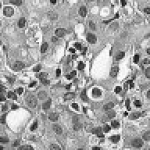

In [ ]:
speckle(grayimg)
print("Original image")
cv2_imshow(grayimg)

#### 3. Noise Filters

a. Gaussian filter

In [ ]:
def gauss_filter(img):
    denoise = cv2.GaussianBlur(img,(3,3),0)
    cv2_imshow(denoise)

b. Mean filter

In [ ]:
def mean_filter(img):
    denoise = cv2.blur(img,(3,3))
    cv2_imshow(denoise)

c. Median filter

In [ ]:
def median_filter(img):
    denoise = cv2.medianBlur(img,3)
    cv2_imshow(denoise)

d.Wiener filter

In [ ]:
from scipy.signal import wiener

In [ ]:
def wiener_filter(img):
    denoise = wiener(img, (3, 3)) 
    cv2_imshow(denoise)

#### 4. Reducing the noise

##### a. Gaussian Noise

Noisy image


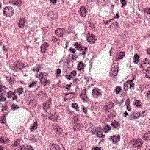

Gaussian image


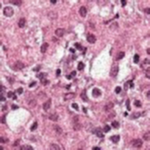

Mean image


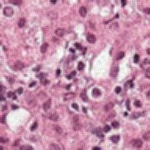

Median image


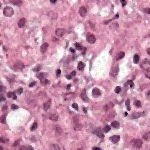

Original image


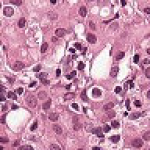

In [ ]:
print("Noisy image")
cv2_imshow(gnso)
print("Gaussian filter")
gauss_filter(gnso)
print("Mean filter")
mean_filter(gnso)
print("Median filter")
median_filter(gnso)
# print("Wiener filter")
#wiener_filter(gnso)
print("Original image")
cv2_imshow(reimage)

Noisy image


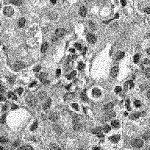

Gaussian filter


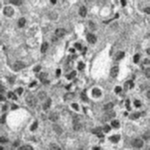

Mean filter


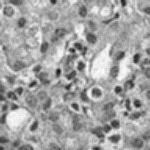

Median filter


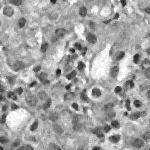

Wiener filter


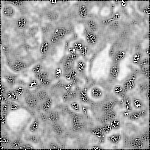

Original image


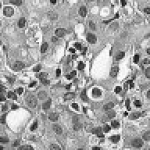

In [ ]:
print("Noisy image")
cv2_imshow(gnsg)
print("Gaussian filter")
gauss_filter(gnsg)
print("Mean filter")
mean_filter(gnsg)
print("Median filter")
median_filter(gnsg)
print("Wiener filter")
wiener_filter(gnsg)
print("Original image")
cv2_imshow(grayimg)

##### b. Salt and Pepper Noise

Noisy image


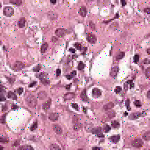

Gaussian filter


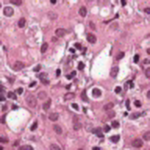

Mean filter


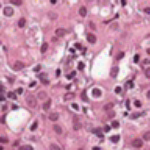

Median filter


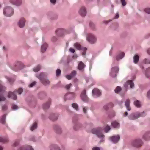

Original image


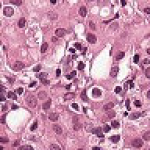

In [ ]:
print("Noisy image")
cv2_imshow(spo)
print("Gaussian filter")
gauss_filter(spo)
print("Mean filter")
mean_filter(spo)
print("Median filter")
median_filter(spo)
# print("Wiener filter")
# wiener_filter(spo)
print("Original image")
cv2_imshow(reimage)

Noisy image


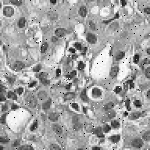

Gaussian filter


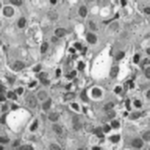

Mean filter


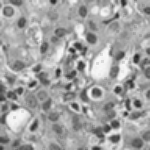

Median filter


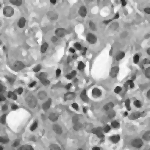

Wiener filter


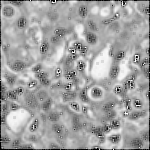

Original image


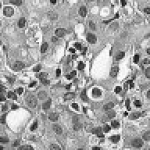

In [ ]:
print("Noisy image")
cv2_imshow(spg)
print("Gaussian filter")
gauss_filter(spg)
print("Mean filter")
mean_filter(spg)
print("Median filter")
median_filter(spg)
print("Wiener filter")
wiener_filter(spg)
print("Original image")
cv2_imshow(grayimg)

##### 3. Poisson Noise

Noisy image


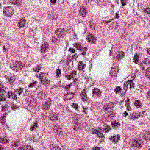

Gaussian filter


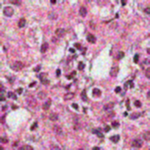

Mean filter


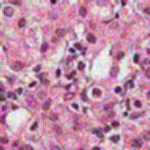

Median filter


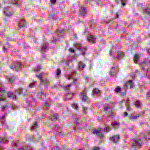

Original image


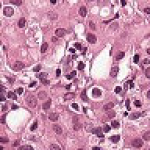

In [ ]:
print("Noisy image")
cv2_imshow(po)
print("Gaussian filter")
gauss_filter(po)
print("Mean filter")
mean_filter(po)
print("Median filter")
median_filter(po)
# print("Wiener filter")
#wiener_filter(po)
print("Original image")
cv2_imshow(reimage)

Noisy image


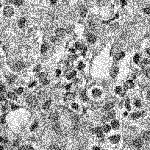

Gaussian filter


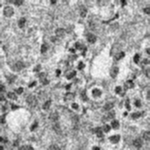

Mean filter


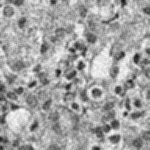

Median filter


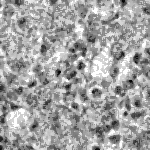

Wiener filter


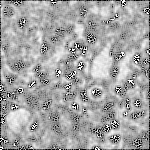

Original image


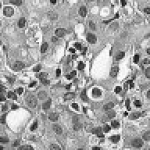

In [ ]:
print("Noisy image")
cv2_imshow(pg)
print("Gaussian filter")
gauss_filter(pg)
print("Mean filter")
mean_filter(pg)
print("Median filter")
median_filter(pg)
print("Wiener filter")
wiener_filter(pg)
print("Original image")
cv2_imshow(grayimg)

##### 4. Speckle Noise

Noisy image


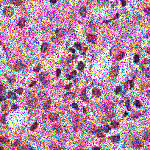

Gaussian filter


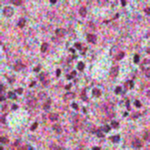

Mean filter


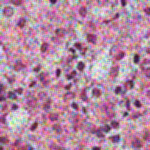

Median filter


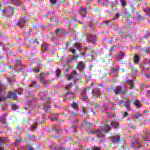

Original image


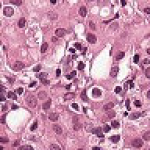

In [ ]:
print("Noisy image")
cv2_imshow(so)
print("Gaussian filter")
gauss_filter(so)
print("Mean filter")
mean_filter(so)
print("Median filter")
median_filter(so)
# print("Wiener filter")
#wiener_filter(so)
print("Original image")
cv2_imshow(reimage)

Noisy image


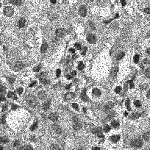

Gaussian filter


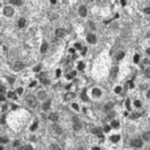

Mean filter


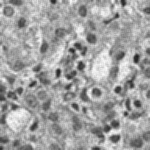

Median filter


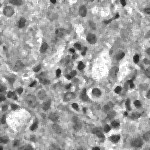

Wiener filter


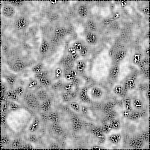

Original image


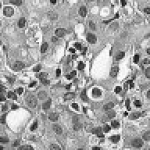

In [ ]:
print("Noisy image")
cv2_imshow(sg)
print("Gaussian filter")
gauss_filter(sg)
print("Mean filter")
mean_filter(sg)
print("Median filter")
median_filter(sg)
print("Wiener filter")
wiener_filter(sg)
print("Original image")
cv2_imshow(grayimg)

### Observation
<pre>
1. It is observed that for Gaussian image, Gaussian filter removes the noise. Mean and median filters are also able to do the same, but they introduce too much blurring.
2. Salt and Pepper noise is removed perfectly by median filter.
3. Poisson noise is reduced to a huge extent by Mean filter.
4. Speckle noise could not be perfectly removed by any of the filters, though Wiener filter is supposed to remove it, the output of the Wiener filter provided by scipy.signal is strange. Mean filter does a close enough job of suppressing most of the noise, but doesn't completely remove it.
</pre>
Note: It is to be noted, that addition of noise has been done both manually and using the python libraries, but noise removing filters have been applied only on the output of the noise added by the python libraries. Also, noise addition and removal has been tested on both color and grayscale images in order to observe the differences, and wiener filter does not work on color images.

Reference
1. https://stackoverflow.com/questions/19289470/adding-poisson-noise-to-an-image
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html
3. https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html